In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('bmh')

import warnings
warnings.filterwarnings("ignore")

In [81]:
train_data = pd.read_csv("./data/train.csv")
test_data = pd.read_csv("./data/test.csv")

### **Inspecting the Data**

In [82]:
train_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [83]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [84]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [85]:
# Getting info on the target column which is the SalePrice
sale_price = train_data['SalePrice']
sale_price.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### **Visual Analysis**

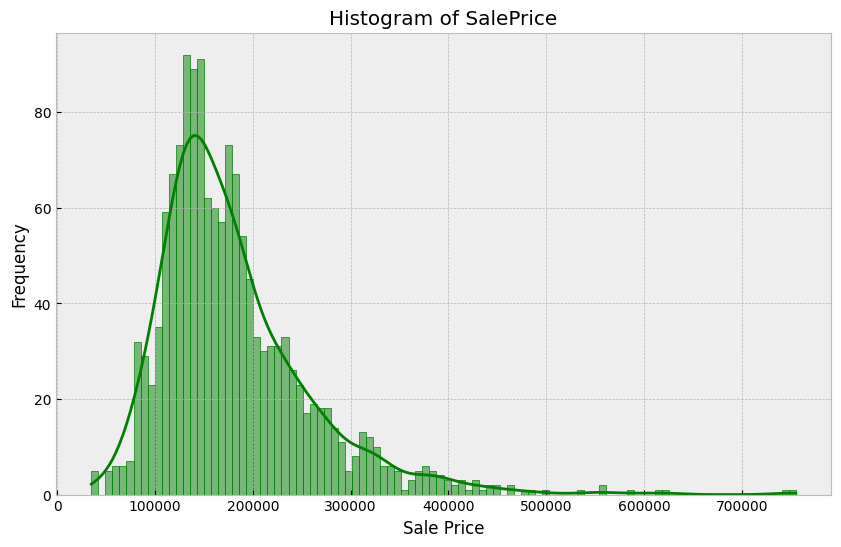

In [86]:
# Target variable distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_data['SalePrice'], bins=100, color='g', edgecolor='g', kde=True)
plt.title('Histogram of SalePrice')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

**Interpretation:** The target variable seems to be right skewed - a positive skew meaning the majority of the data is on the left side of a graph, and the mean is greater than the median. To make the distribution normal we can try different transformation and decrease the skewness of the data.

In [87]:
# Numerical Data Distribution
train_data_num = train_data.select_dtypes(include= ['float64', 'int64'])

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,

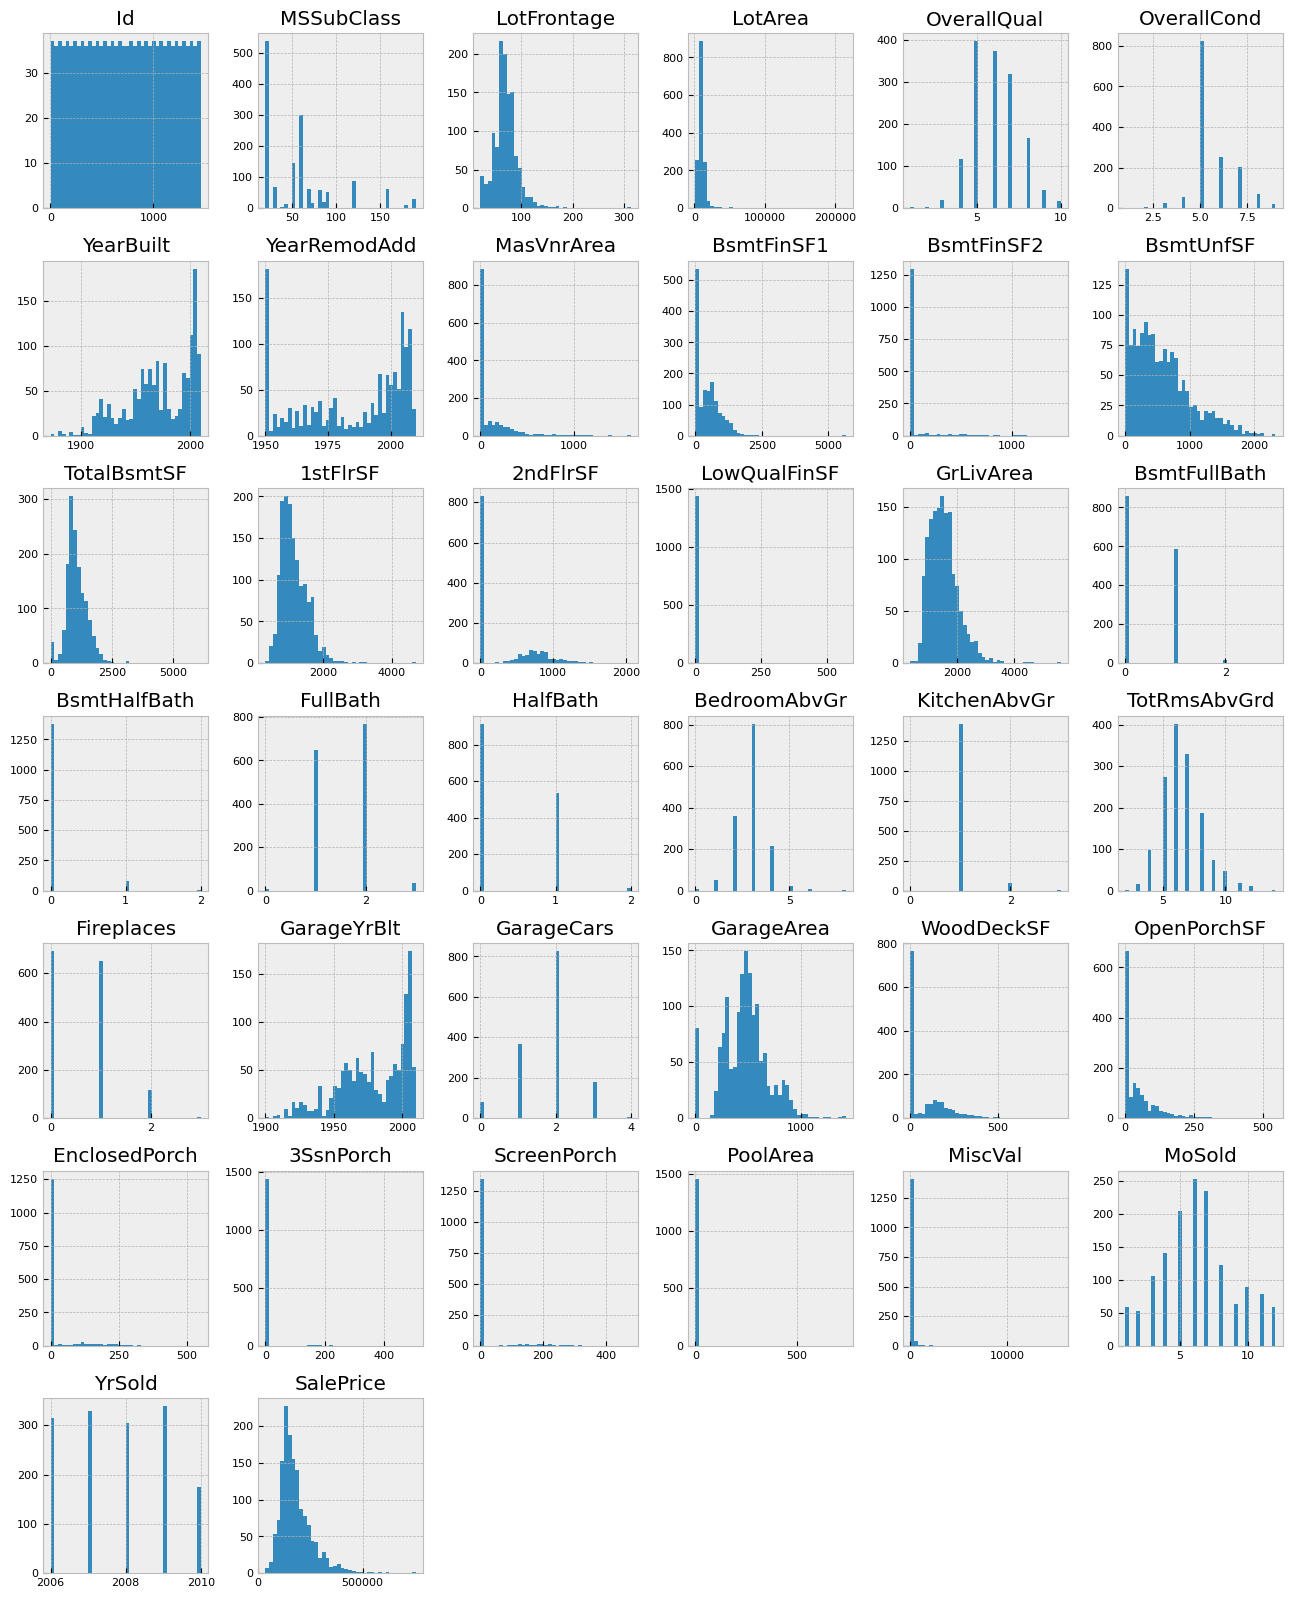

In [88]:
train_data_num.hist(figsize=(16, 20), bins=40, xlabelsize=8, ylabelsize=8)

**Interpretation:** The features such as `LotFrontage`, `TotalBsmtSF`, `1stFlrSF`, `GrLivArea`, `GarageArea` and `SalePrice` are having similar skewed distribution. We can try getting these column programmatically and implement transformation later on.

In [89]:
# getting features that are highly correlated with SalePrice
def get_top_corr(df, target_var):
    df_corr = df.corr()[target_var][:-1]
    top_corr = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
    print("There are {} strongly correlated values with {}:\n{}".format(len(top_corr),target_var, top_corr))

In [90]:
train_corr = train_data_num.copy()
get_top_corr(train_corr, 'SalePrice')

There are 10 strongly correlated values with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


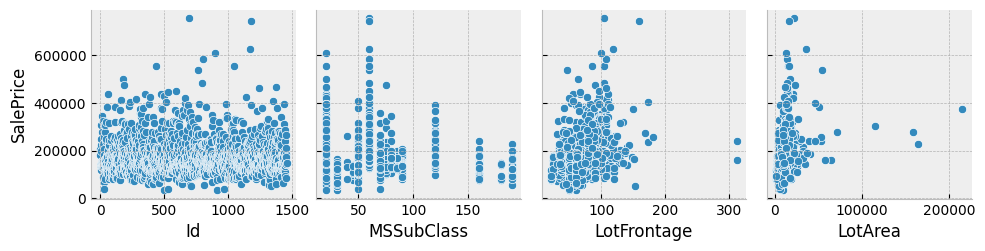

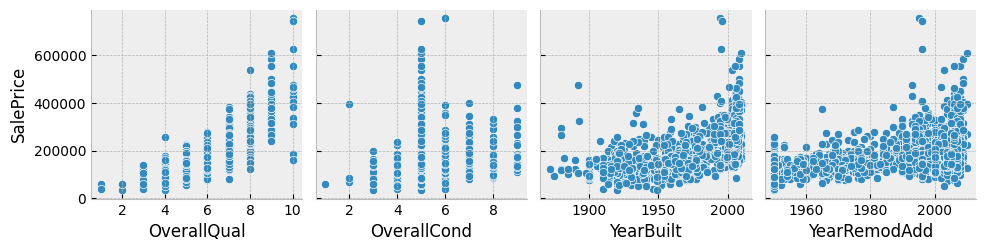

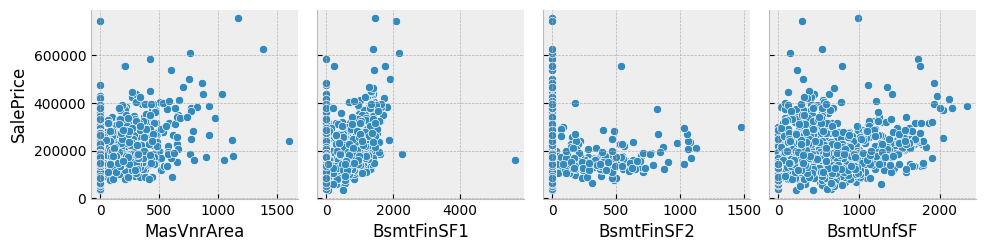

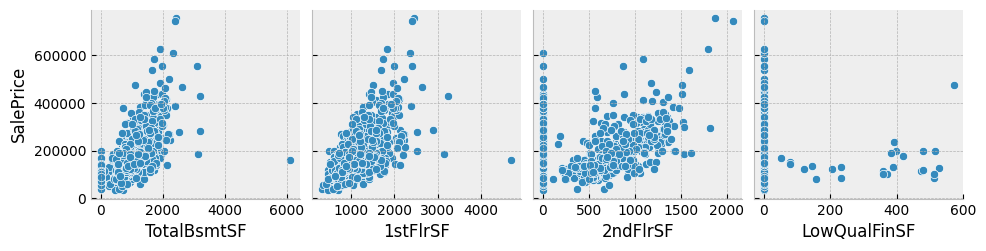

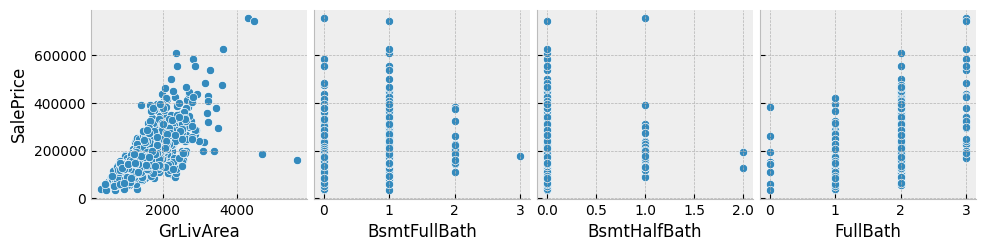

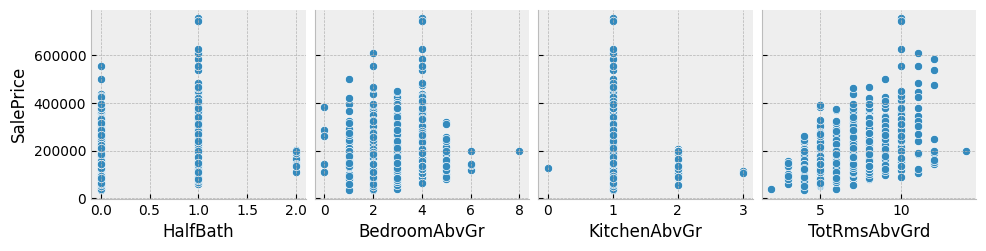

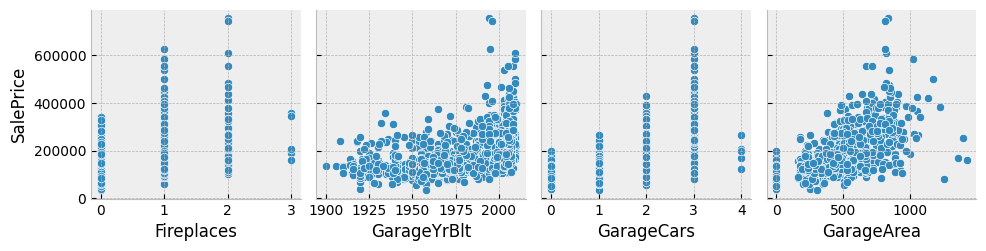

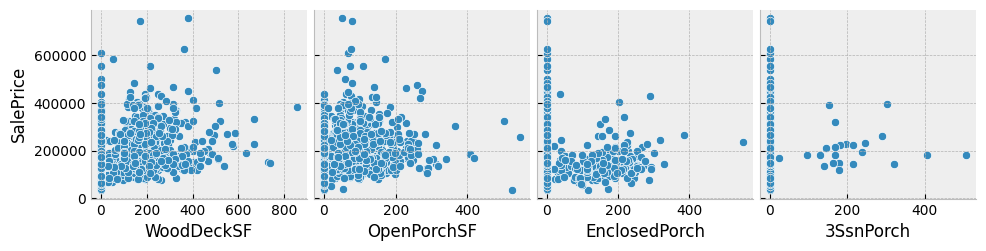

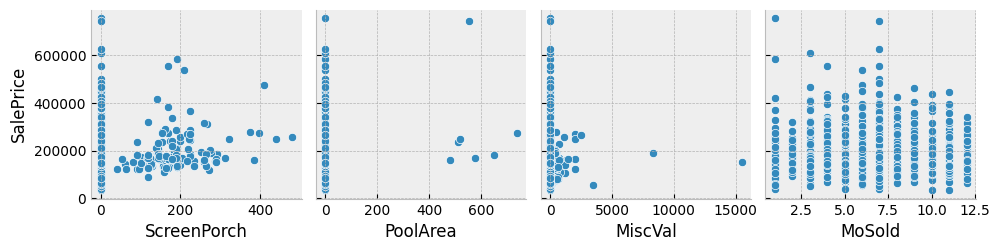

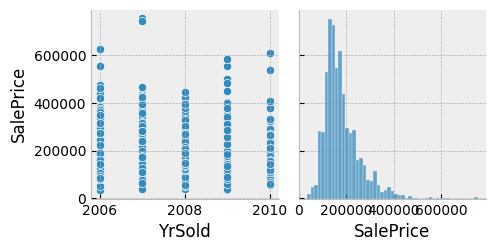

In [91]:
for i in range(0, len(train_data_num.columns), 4):
    sns.pairplot(data=train_data_num, x_vars=train_data_num.columns[i:i+4], y_vars=['SalePrice'])

There are some features with 0 value meaning that feature or facility is not present in the house. When removing these 0 values the correlation between the features and the target variable changes which can allow us to get more features which influence the target variable. I would be removing them just for the correlation but keep them in the final training.

In [92]:
def calculate_correlations(df, target_var):
    correlations = {}
    
    for column in df.columns:
        if column != target_var:
            filtered_df = df[df[column] != 0]
            correlation = filtered_df[[column, target_var]].corr().iloc[0, 1]
            correlations[column] = correlation
    sorted_correlations = sorted(correlations.items(), key=lambda item: abs(item[1]), reverse=True)
    
    for key, value in sorted_correlations:
        if abs(value) > 0.45:
            print(f"{key:<12}: {value}")
    
    top_feat = [key for key, value in sorted_correlations if abs(value) >= 0.45]
    print("There are {} strongly correlated values with {}:\n{}".format(len(top_feat), target_var, top_feat))
    return top_feat

In [93]:
train_corr_dummy = train_data_num.copy()
top_feat = calculate_correlations(train_corr_dummy, 'SalePrice')

OverallQual : 0.7909816005838053
GrLivArea   : 0.7086244776126515
2ndFlrSF    : 0.6733048324568376
GarageCars  : 0.6370954062078923
TotalBsmtSF : 0.6096808188074374
GarageArea  : 0.6084052829168346
1stFlrSF    : 0.6058521846919153
FullBath    : 0.5745626737760822
TotRmsAbvGrd: 0.5337231555820284
YearBuilt   : 0.5228973328794967
YearRemodAdd: 0.5071009671113866
GarageYrBlt : 0.4863616774878596
BsmtFinSF1  : 0.47169042652357296
There are 13 strongly correlated values with SalePrice:
['OverallQual', 'GrLivArea', '2ndFlrSF', 'GarageCars', 'TotalBsmtSF', 'GarageArea', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'BsmtFinSF1']


In [94]:
def plot_high_correlations(data, target_var, threshold=0.45):
    corr = data.drop(columns=[target_var]).corr()
    mask = (corr >= threshold) | (corr <= -threshold)
    
    plt.figure(figsize=(12, 10))
    
    sns.heatmap(corr[mask], 
                cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
                annot=True, annot_kws={"size": 6}, square=True)
    plt.title(f'Features with Correlation >= {threshold} or <= -{threshold}', fontsize=16)
    plt.show()


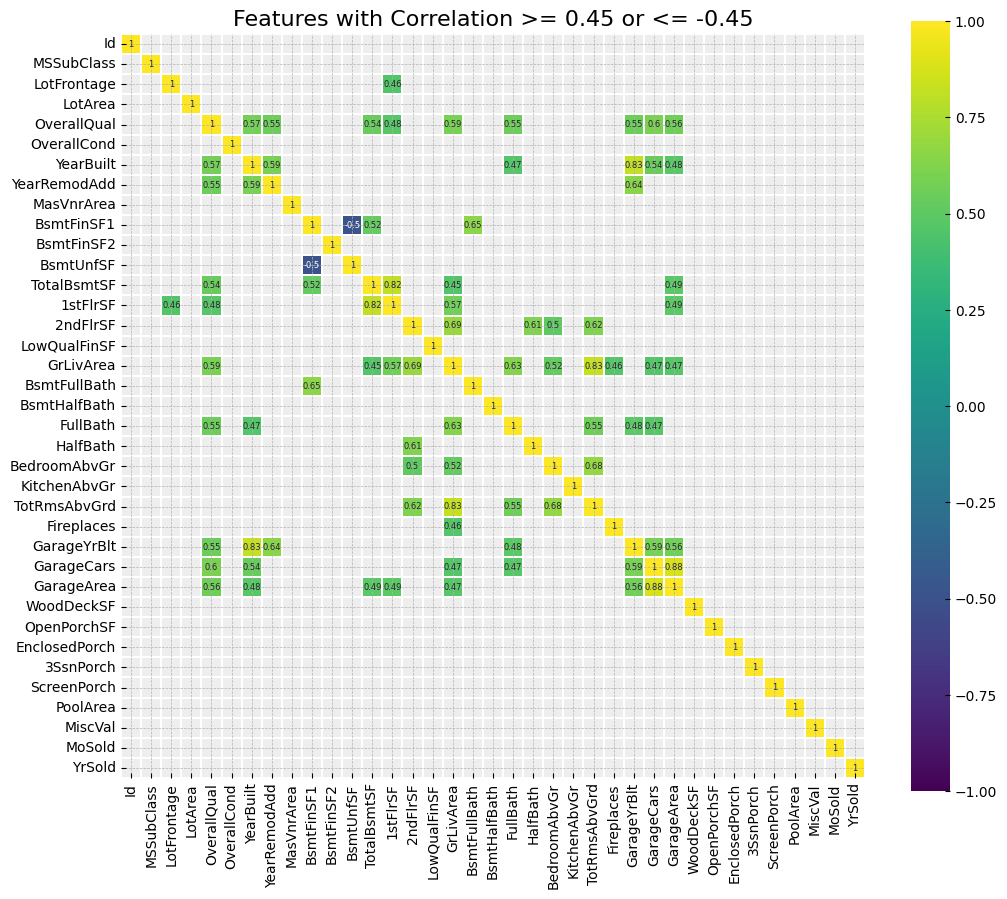

In [95]:
plot_high_correlations(train_data_num, 'SalePrice')

We can see what variables are linked together here! Based the correlation between features we can deduce whether we can combine features and process.

### **Q-Q and C-Q Plots**

In [96]:
# Relation between quantitative features
get_feat = np.intersect1d(train_data_num.columns.to_list(), top_feat)
print(get_feat)

# features which are categorical numerical values
get_feat = list(set(get_feat) - set(["FullBath", "GarageCars", "OverallQual", "TotRmsAbvGrd"]))
# train_data_num['YearRemodAdd'].nunique()
print(get_feat)

['1stFlrSF' '2ndFlrSF' 'BsmtFinSF1' 'FullBath' 'GarageArea' 'GarageCars'
 'GarageYrBlt' 'GrLivArea' 'OverallQual' 'TotRmsAbvGrd' 'TotalBsmtSF'
 'YearBuilt' 'YearRemodAdd']
['YearRemodAdd', 'BsmtFinSF1', '1stFlrSF', 'TotalBsmtSF', '2ndFlrSF', 'GarageArea', 'YearBuilt', 'GrLivArea', 'GarageYrBlt']


In [97]:
def plot_feature_vs_target(features, target_var, data, cols=3, figsize=(18, 12)):
    rows = (len(features) + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten()
    
    for i, feature in enumerate(features):
        if i < len(features):
            sns.regplot(x=feature, y=target_var, data=data, ax=axes[i])
            axes[i].set_title(f'{feature} vs {target_var}')
        else:
            axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()


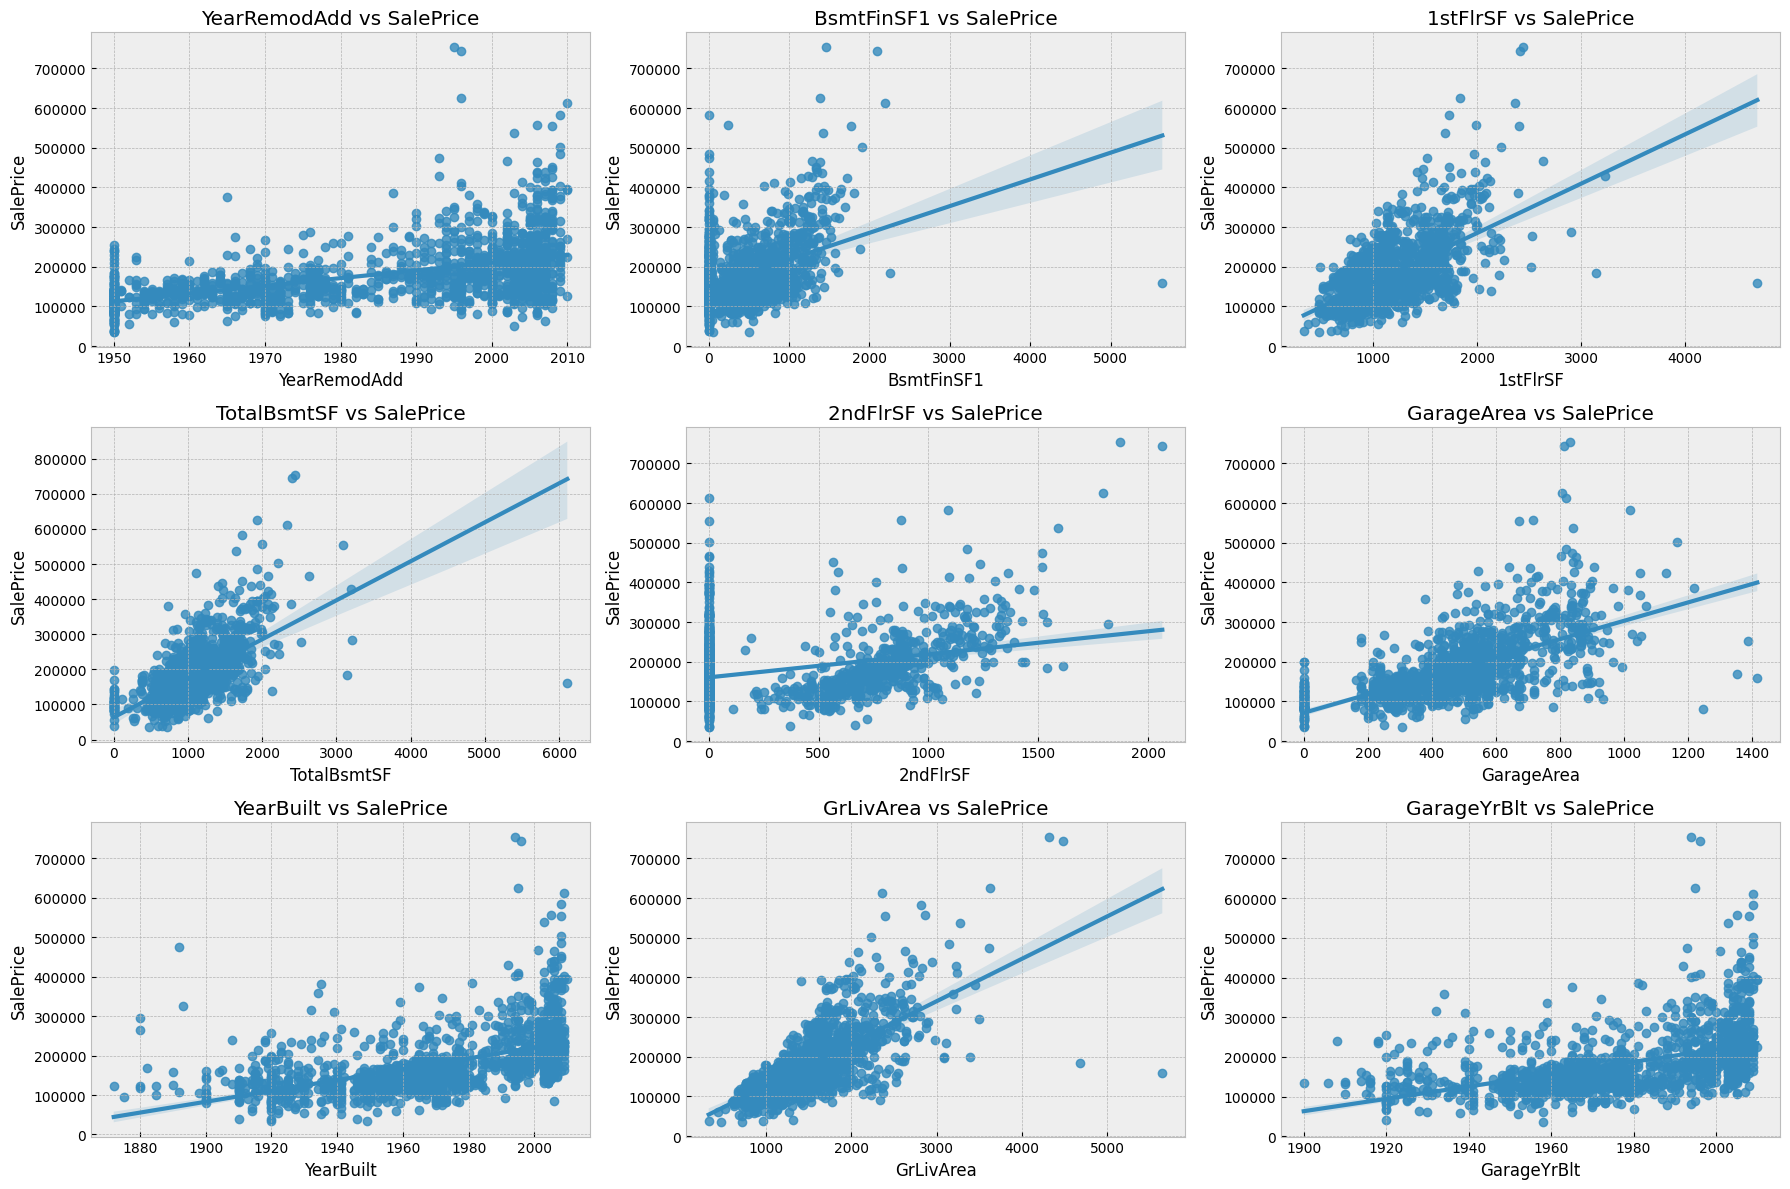

In [98]:
plot_feature_vs_target(get_feat, 'SalePrice', train_data_num)

In [99]:
train_cat = train_data.select_dtypes(include= ["object"])

In [108]:
# For categorical data
def plot_categorical_features(data, cols=3, figsize=(20, 45)):
    num_features = len(data.columns)
    rows = (num_features + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten()
    
    for i, ax in enumerate(axes):
        if i < num_features:
            feature = data.columns[i]
            sns.countplot(x=feature, data=data, alpha=0.7, ax=ax)
            ax.set_title(feature)
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
        else:
            ax.set_visible(False)

    fig.tight_layout()
    plt.show()

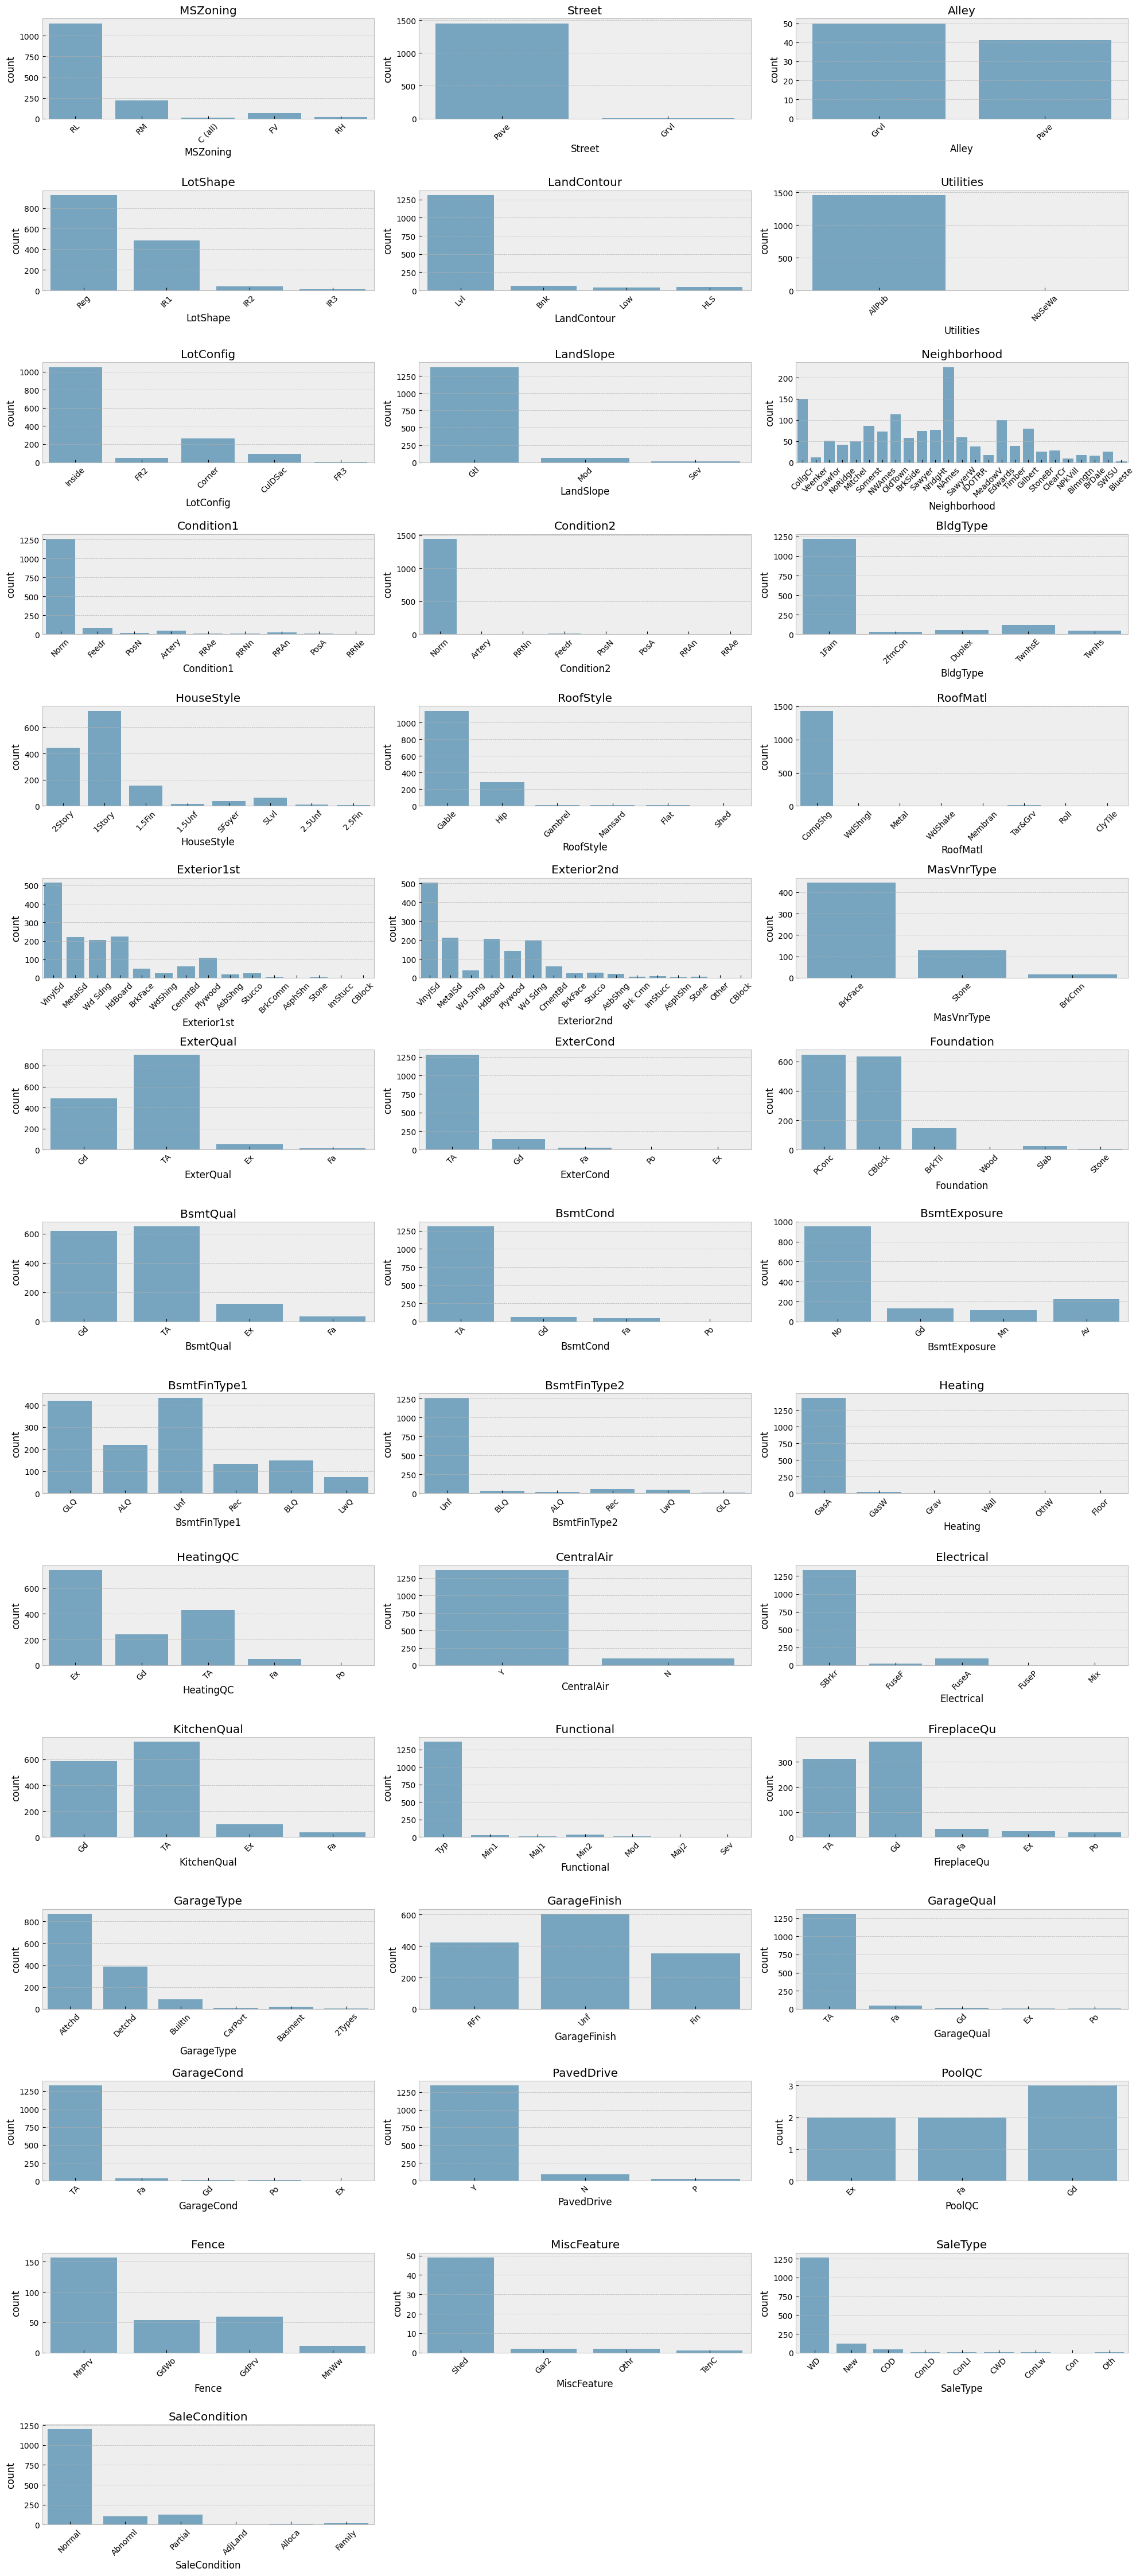

In [109]:
plot_categorical_features(train_cat)

In [110]:
outliers_count = np.array([])
columns_with_outliers = np.array([])

for i_col in train_data_num.columns:
    train_num_i = train_data_num.loc[:,i_col]
    q25, q75 = round((train_num_i.quantile(q=0.25)), 3), round((train_num_i.quantile(q=0.75)), 3)
    IQR = round((q75 - q25), 3)
    cut_off = IQR * 1.5
    lower, upper = round((q25 - cut_off), 3), round((q75 + cut_off), 3)
    
    outliers = train_num_i[(train_num_i < lower) | (train_num_i > upper)]
    
    if not outliers.empty:
        columns_with_outliers = np.append(columns_with_outliers, i_col)
        outliers_count = np.append(outliers_count, outliers.count())

    # print(i_col, 'q25=', q25, 'q75=', q75, 'IQR=', IQR)
    # print('lower, upper:', lower, upper)
    print(f"Number of Outliers for {i_col}: ", outliers.count())
    print(" ")

Number of Outliers for Id:  0
 
Number of Outliers for MSSubClass:  103
 
Number of Outliers for LotFrontage:  88
 
Number of Outliers for LotArea:  69
 
Number of Outliers for OverallQual:  2
 
Number of Outliers for OverallCond:  125
 
Number of Outliers for YearBuilt:  7
 
Number of Outliers for YearRemodAdd:  0
 
Number of Outliers for MasVnrArea:  96
 
Number of Outliers for BsmtFinSF1:  7
 
Number of Outliers for BsmtFinSF2:  167
 
Number of Outliers for BsmtUnfSF:  29
 
Number of Outliers for TotalBsmtSF:  61
 
Number of Outliers for 1stFlrSF:  20
 
Number of Outliers for 2ndFlrSF:  2
 
Number of Outliers for LowQualFinSF:  26
 
Number of Outliers for GrLivArea:  31
 
Number of Outliers for BsmtFullBath:  1
 
Number of Outliers for BsmtHalfBath:  82
 
Number of Outliers for FullBath:  0
 
Number of Outliers for HalfBath:  0
 
Number of Outliers for BedroomAbvGr:  35
 
Number of Outliers for KitchenAbvGr:  68
 
Number of Outliers for TotRmsAbvGrd:  30
 
Number of Outliers for Fir

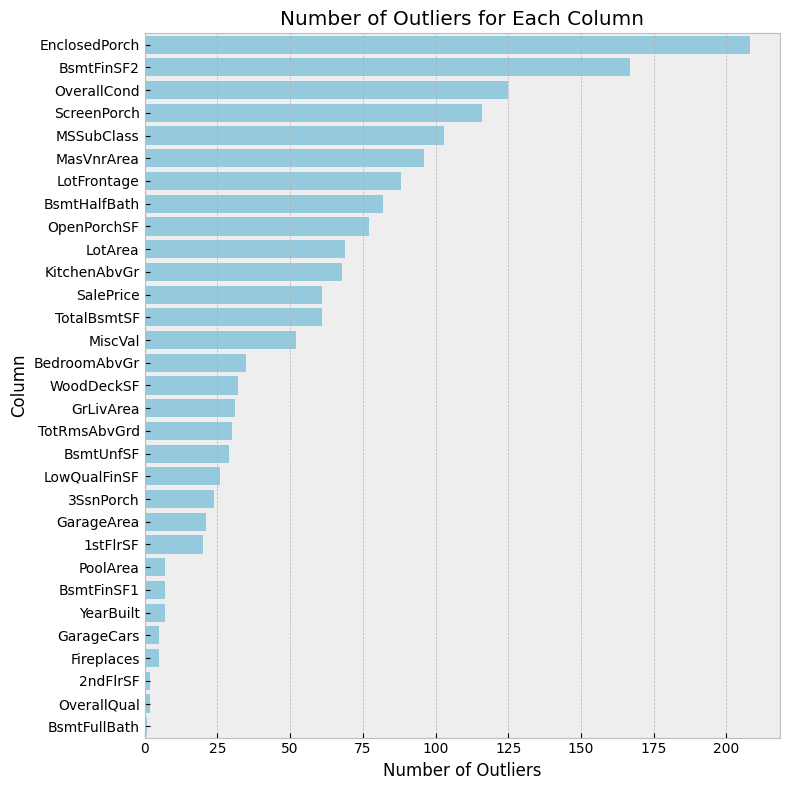

In [111]:
outliers_df = pd.DataFrame({'Column': columns_with_outliers, 'Outliers': outliers_count})
outliers_df = outliers_df.sort_values(by='Outliers', ascending=False)

plt.figure(figsize=(8, 8))
sns.barplot(data=outliers_df, x='Outliers', y='Column', color='skyblue')
plt.title('Number of Outliers for Each Column')
plt.xlabel('Number of Outliers')
plt.ylabel('Column')
plt.tight_layout()
plt.show()

### **NULL and Duplicate Records Statistics**

In [112]:
# getting null value counts
null_counts = train_data.isnull().sum()

print("Null Values in Training Data:")
print("="*30)
sorted_null_counts = null_counts[null_counts > 0].sort_values(ascending=False)
print(sorted_null_counts)

Null Values in Training Data:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


In [116]:
train_data.duplicated().sum()

0

Inspired from: https://www.kaggle.com/code/ekami66/detailed-exploratory-data-analysis-with-python